In [ ]:
print("24BAD004")
print("K ADHITHYA")

24BAD004
K ADHITHYA


In [ ]:
import kagglehub
spscientist_students_performance_in_exams_path = kagglehub.dataset_download('spscientist/students-performance-in-exams')

print('Data source import complete.')


Using Colab cache for faster access to the 'students-performance-in-exams' dataset.
Data source import complete.


In [ ]:

import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,1,1,1,72,72,74
1,0,group C,4,1,0,69,90,88
2,0,group B,3,1,1,90,95,93
3,1,group A,0,0,1,47,57,44
4,1,group C,4,1,1,76,78,75


In [ ]:
df['final_score'] = (df['math score'] +df['reading score'] +df['writing score']) / 3

In [ ]:
X = df[['gender', 'lunch', 'test preparation course','parental level of education']]
y = df['final_score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.94880848,  0.72776144,  0.73178456,  0.29665852],
       [-0.94880848, -1.37407665, -1.36652242, -0.80207674],
       [-0.94880848, -1.37407665,  0.73178456,  0.84602615],
       ...,
       [-0.94880848,  0.72776144,  0.73178456, -1.35144437],
       [ 1.05395348, -1.37407665, -1.36652242,  0.84602615],
       [-0.94880848,  0.72776144,  0.73178456, -1.35144437]])

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 195.18089021116967
RMSE: 13.97071545094129
R2 Score: 0.08949938767891052


In [ ]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

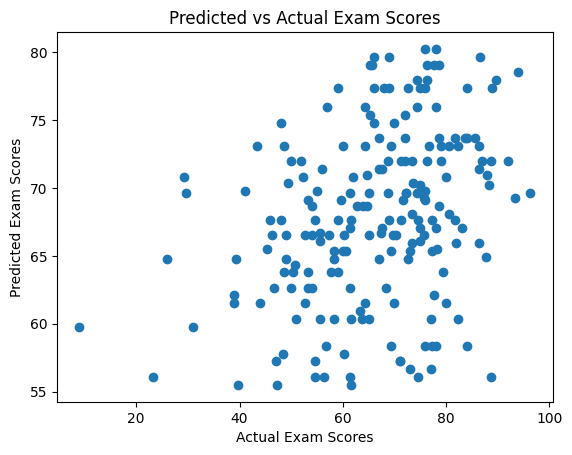

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Predicted vs Actual Exam Scores")
plt.show()

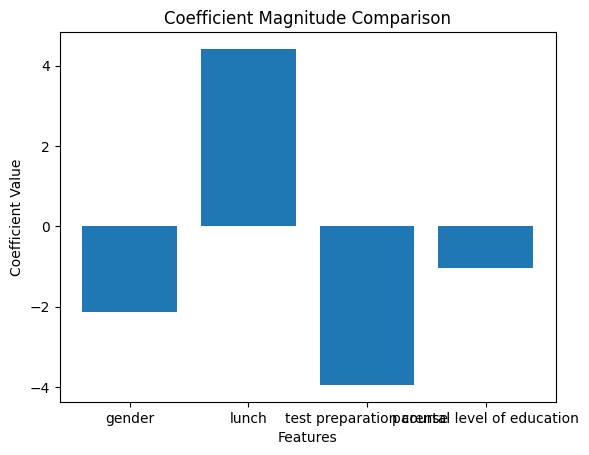

In [ ]:
features = ['gender', 'lunch', 'test preparation course',
            'parental level of education']

coefficients = model.coef_

plt.figure()
plt.bar(features, coefficients)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Magnitude Comparison")
plt.show()

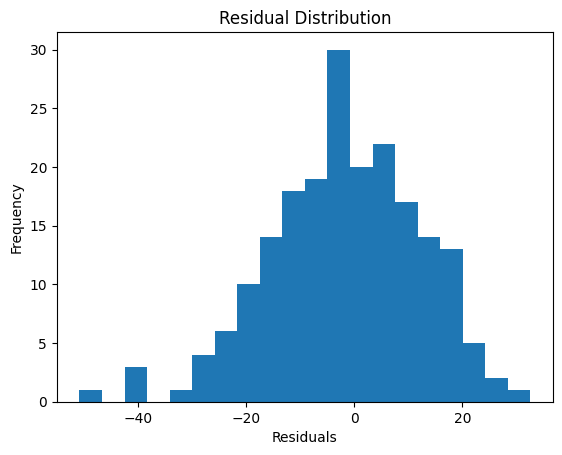

In [ ]:
residuals = y_test - y_pred

plt.figure()
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()